In [129]:
import numpy as np
import matplotlib.pyplot as plt

In [130]:
def recursive_least_square_general(input_signal_rls, forgetting_factor, exp_forgetting):
    # Initialization
    lambda_val = forgetting_factor
    y_k2, y_k1, u_k1, u_k2 = 0, 0, 0, 0
    phi = np.array([-y_k1, -y_k2, u_k1, u_k2])

    # Parameters of the true model
    at1, at2, bt0, bt1 = 0.5, 1, 0.25, -0.25

    # Input signal
    input_signal = input_signal_rls

    # Initial parameter values
    param_estimated = np.array([0, 0, 0.01, 0.2]).reshape((-1, 1))

    # Initial covariance matrix
    cov = np.eye(4)
    cov[0, 0] = 100
    cov[1, 1] = 100
    cov[2, 2] = 100
    cov[3, 3] = 100

    # Lists to store the results
    y_actual_aggregate = []
    error_aggregated = []
    at1_aggregate, at2_aggregate, bt0_aggregate, bt1_aggregate = [], [], [], []
    a1_aggregated, a2_aggregated, b0_aggregated, b1_aggregated = [], [], [], []

    flag = 0
    for q in range(len(input_signal)):
        # Parameter estimation
        if q > 150 and flag == 0 and exp_forgetting == 1:
            flag = 1
            at1, at2, bt0, bt1 = 0.75, 0.75, 0.5, -0.5

        # Estimate the parameters (RLS)
        phi = np.array([-y_k1, -y_k2, u_k1, u_k2]).reshape((-1, 1))
        error = np.random.normal(0, 0.5)
        
        y_current_actual = -at1 * y_k1 - at2 * y_k2 + bt0 * u_k1 + bt1 * u_k2 + error

        cov = cov - cov @ phi @ np.linalg.inv(lambda_val + phi.T @ cov @ phi) @ phi.T @ cov
        gain = cov @ phi
        param_estimated = param_estimated + gain * (y_current_actual - phi.T @ param_estimated)
        
        # cov_phi = np.dot(cov, phi)
        # gain = cov_phi / (lambda_val + np.dot(phi, cov_phi))
        # param_estimated = param_estimated + gain * (y_current_actual - np.dot(phi, param_estimated))

        a1, a2, b0, b1 = param_estimated
        y_est = phi.T @ param_estimated
        # y_est = np.dot(phi, param_estimated)

        old_y_k1, old_u_k1 = y_k1, u_k1
        y_k2, y_k1 = y_k1, y_current_actual
        u_k2, u_k1 = u_k1, input_signal[q]

        # Store the results
        y_actual_aggregate.append(y_current_actual)
        error_aggregated.append(error)
        at1_aggregate.append(at1)
        at2_aggregate.append(at2)
        bt0_aggregate.append(bt0)
        bt1_aggregate.append(bt1)
        a1_aggregated.append(a1)
        a2_aggregated.append(a2)
        b0_aggregated.append(b0)
        b1_aggregated.append(b1)
    
    return (
        y_actual_aggregate,
        error_aggregated,
        at1_aggregate,
        at2_aggregate,
        bt0_aggregate,
        bt1_aggregate,
        a1_aggregated,
        a2_aggregated,
        b0_aggregated,
        b1_aggregated
    )

In [131]:
# Part A: Delayed delta-dirac input function
t = np.arange(100)
input_signal_1 = np.zeros(len(t))
input_signal_1[50] = 1
results_a = recursive_least_square_general(input_signal_1, 1, 0)

# Part B: sin(2*pi*t/10) + cos(6*pi*t/10) input function
input_signal_2 = np.sin(2 * np.pi * t / 10) + np.cos(6 * np.pi * t / 10)
results_b = recursive_least_square_general(input_signal_2, 1, 0)

# Part C: Exponential forgetting
results_c = recursive_least_square_general(input_signal_2, 0.99, 1)

In [132]:
# Print the results
print("Part A:")
print("True Parameters (at1, at2, bt0, bt1):", 0.5, 1, 0.25, -0.25)
print("Estimated Parameters (a1, a2, b0, b1):", results_a[6][-1], results_a[7][-1], results_a[8][-1], results_a[9][-1])
print()
print("Part B:")
print("True Parameters (at1, at2, bt0, bt1):", 0.5, 1, 0.25, -0.25)
print("Estimated Parameters (a1, a2, b0, b1):", results_b[6][-1], results_b[7][-1], results_b[8][-1], results_b[9][-1])
print()
print("Part C:")
print("True Parameters for t <= 150 (at1, at2, bt0, bt1):", 0.5, 1, 0.25, -0.25)
print("True Parameters for t > 150 (at1, at2, bt0, bt1):", 0.75, 0.75, 0.5, -0.5)
print("Estimated Parameters (a1, a2, b0, b1):", results_c[6][-1], results_c[7][-1], results_c[8][-1], results_c[9][-1])

Part A:
True Parameters (at1, at2, bt0, bt1): 0.5 1 0.25 -0.25
Estimated Parameters (a1, a2, b0, b1): [0.48445301] [0.910311] [-0.15997612] [-0.54463977]

Part B:
True Parameters (at1, at2, bt0, bt1): 0.5 1 0.25 -0.25
Estimated Parameters (a1, a2, b0, b1): [0.49326824] [0.99285012] [0.27429788] [-0.25055706]

Part C:
True Parameters for t <= 150 (at1, at2, bt0, bt1): 0.5 1 0.25 -0.25
True Parameters for t > 150 (at1, at2, bt0, bt1): 0.75 0.75 0.5 -0.5
Estimated Parameters (a1, a2, b0, b1): [0.45255744] [0.99451286] [0.30341633] [-0.25761036]


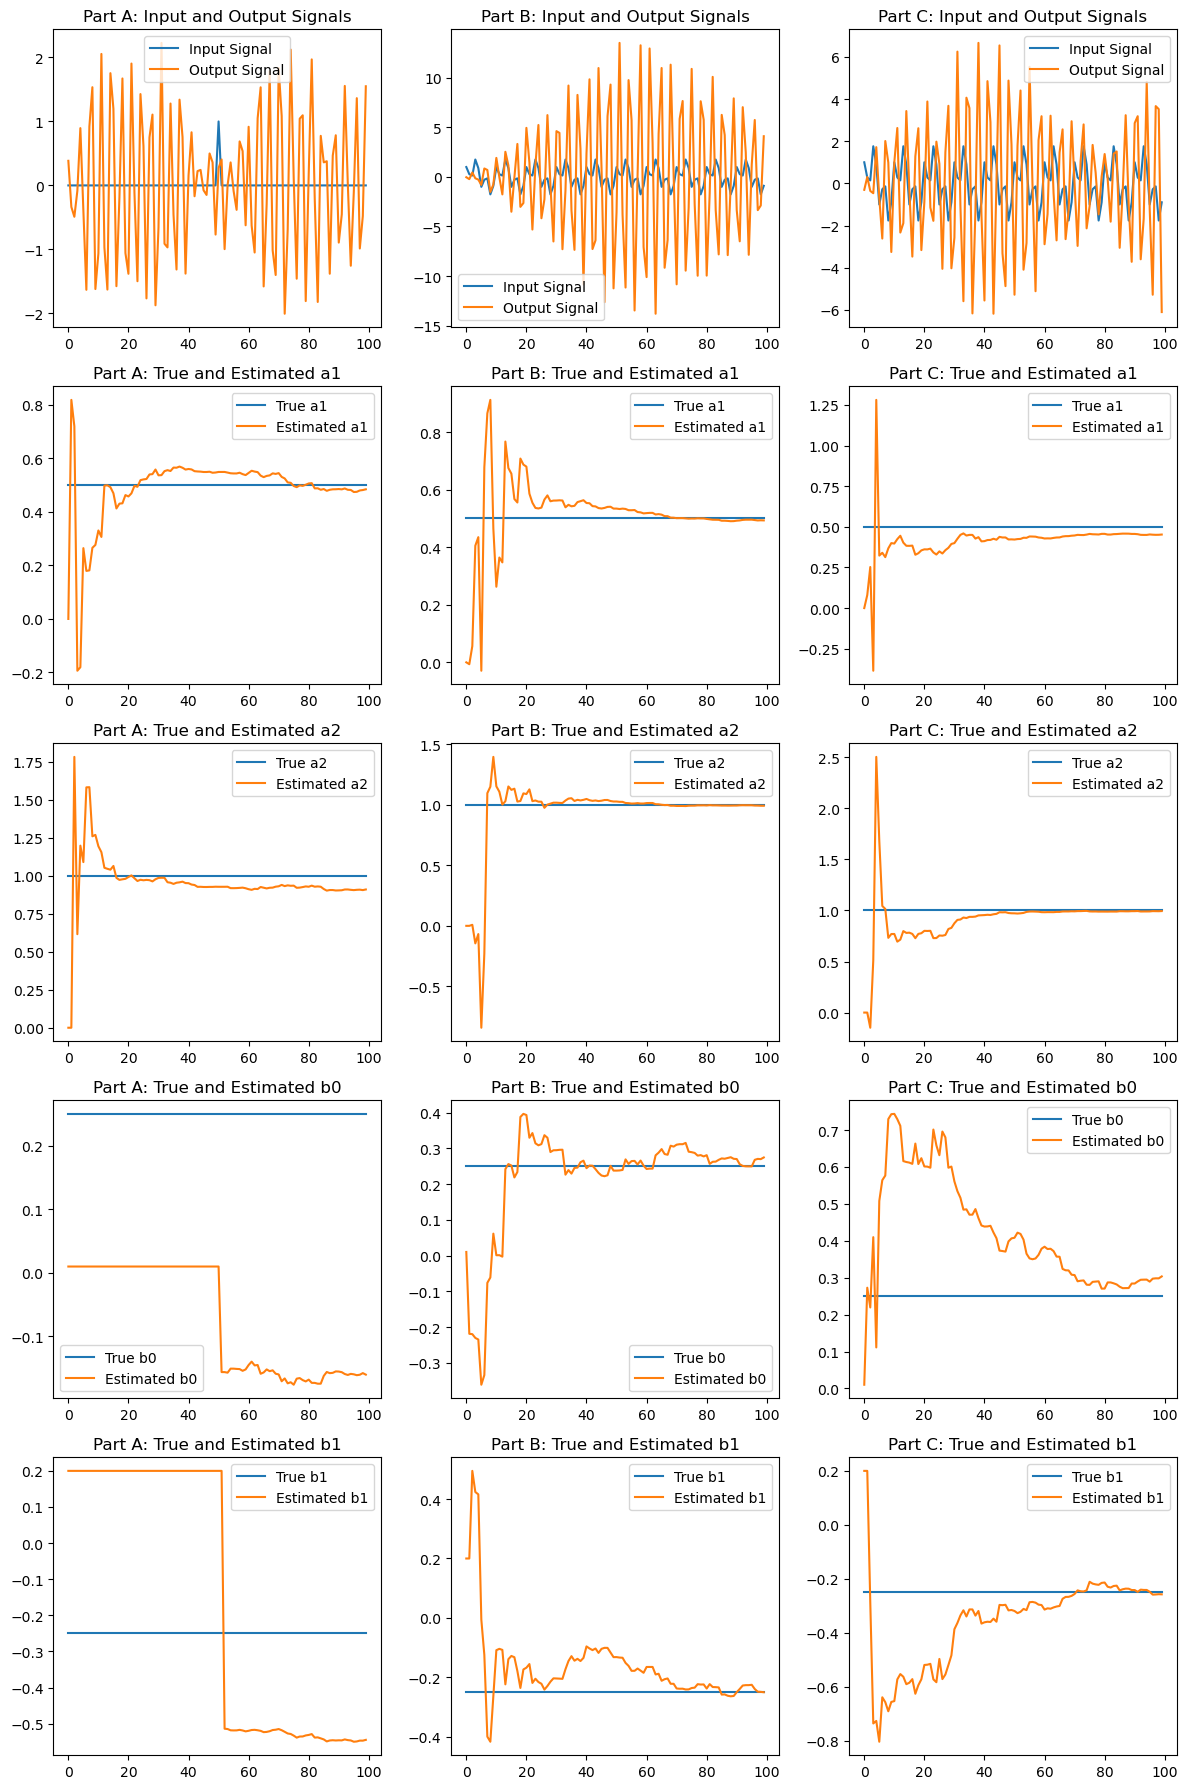

In [133]:
# Plotting
fig, axs = plt.subplots(5, 3, figsize=(12, 18))

# Part A Plots
axs[0, 0].plot(t, input_signal_1, label='Input Signal')
axs[0, 0].plot(t, results_a[0], label='Output Signal')
axs[0, 0].set_title('Part A: Input and Output Signals')
axs[0, 0].legend()

axs[1, 0].plot(t, results_a[2], label='True a1')
axs[1, 0].plot(t, results_a[6], label='Estimated a1')
axs[1, 0].set_title('Part A: True and Estimated a1')
axs[1, 0].legend()

axs[2, 0].plot(t, results_a[3], label='True a2')
axs[2, 0].plot(t, results_a[7], label='Estimated a2')
axs[2, 0].set_title('Part A: True and Estimated a2')
axs[2, 0].legend()

axs[3, 0].plot(t, results_a[4], label='True b0')
axs[3, 0].plot(t, results_a[8], label='Estimated b0')
axs[3, 0].set_title('Part A: True and Estimated b0')
axs[3, 0].legend()

axs[4, 0].plot(t, results_a[5], label='True b1')
axs[4, 0].plot(t, results_a[9], label='Estimated b1')
axs[4, 0].set_title('Part A: True and Estimated b1')
axs[4, 0].legend()

# Part B Plots
axs[0, 1].plot(t, input_signal_2, label='Input Signal')
axs[0, 1].plot(t, results_b[0], label='Output Signal')
axs[0, 1].set_title('Part B: Input and Output Signals')
axs[0, 1].legend()

axs[1, 1].plot(t, results_b[2], label='True a1')
axs[1, 1].plot(t, results_b[6], label='Estimated a1')
axs[1, 1].set_title('Part B: True and Estimated a1')
axs[1, 1].legend()

axs[2, 1].plot(t, results_b[3], label='True a2')
axs[2, 1].plot(t, results_b[7], label='Estimated a2')
axs[2, 1].set_title('Part B: True and Estimated a2')
axs[2, 1].legend()

axs[3, 1].plot(t, results_b[4], label='True b0')
axs[3, 1].plot(t, results_b[8], label='Estimated b0')
axs[3, 1].set_title('Part B: True and Estimated b0')
axs[3, 1].legend()

axs[4, 1].plot(t, results_b[5], label='True b1')
axs[4, 1].plot(t, results_b[9], label='Estimated b1')
axs[4, 1].set_title('Part B: True and Estimated b1')
axs[4, 1].legend()

# Part C Plots
axs[0, 2].plot(t, input_signal_2, label='Input Signal')
axs[0, 2].plot(t, results_c[0], label='Output Signal')
axs[0, 2].set_title('Part C: Input and Output Signals')
axs[0, 2].legend()

axs[1, 2].plot(t, results_c[2], label='True a1')
axs[1, 2].plot(t, results_c[6], label='Estimated a1')
axs[1, 2].set_title('Part C: True and Estimated a1')
axs[1, 2].legend()

axs[2, 2].plot(t, results_c[3], label='True a2')
axs[2, 2].plot(t, results_c[7], label='Estimated a2')
axs[2, 2].set_title('Part C: True and Estimated a2')
axs[2, 2].legend()

axs[3, 2].plot(t, results_c[4], label='True b0')
axs[3, 2].plot(t, results_c[8], label='Estimated b0')
axs[3, 2].set_title('Part C: True and Estimated b0')
axs[3, 2].legend()

axs[4, 2].plot(t, results_c[5], label='True b1')
axs[4, 2].plot(t, results_c[9], label='Estimated b1')
axs[4, 2].set_title('Part C: True and Estimated b1')
axs[4, 2].legend()

plt.tight_layout()

plt.show()